# 不同金融资产类别指南

## 学习目标
通过本笔记本的学习，您将理解：
- 主要交易资产类别的特征
- 每种资产类型的经纪商选择
- 影响资产价格的关键价值驱动因素（通过真实数据演示）
- 每个资产类别的交易策略和注意事项
- 这些市场的历史背景和演变

## 目录
1. [介绍与共同特征](#introduction)
2. [股票：盈利影响分析](#stocks)
3. [债券：利率敏感性](#bonds)
4. [ETF：分散化优势](#etfs)
5. [大宗商品：季节性效应](#commodities)
6. [美元：美联储政策影响](#usd)
7. [黄金与美元强弱关系](#gold)

## 1. 介绍与共同特征

### 什么是交易资产？
交易资产是可以在金融市场中买卖或交换的金融工具。每个资产类别都有独特的特征，但它们共享共同要素：

### 通用交易要求
- **经纪账户**：执行交易的持牌中介
- **市场接入**：连接到交易所或交易平台
- **资本**：初始投资资金
- **研究与分析**：基本面和技术分析工具
- **风险管理**：止损、头寸规模、投资组合分散化

### 常见交易概念
- **回测**：在历史数据上测试交易策略
- **模拟交易**：不使用真实资金的模拟交易
- **流动性**：资产买卖的容易程度
- **波动性**：价格波动的程度
- **价差**：买入价和卖出价之间的差异
- **交易时间**：可进行交易的时间段

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

sns.set_palette("husl")

# print("📊 数据集描述")
# print("=" * 80)
# print("\n🔹 股票数据 (stock_earnings_data.csv):")
# print("   • 带有盈利公告窗口标记的AAPL股票价格")
# print("   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 日回报率, 盈利窗口")
# print("   • 目的: 展示公司盈利如何驱动股票价格波动")
# print("   • 关键洞察: 季度盈利发布期间波动率飙升")

# print("\n🔹 债券数据 (bond_interest_rate_data.csv):")
# print("   • TLT(20+年期国债ETF)价格 vs 10年期国债收益率")
# print("   • 列: 债券价格, 利率, 债券回报率, 利率变化")
# print("   • 目的: 显示债券价格与利率的逆向关系")
# print("   • 关键洞察: 利率上升时债券价格下跌(久期风险)")

# print("\n🔹 大宗商品数据 (commodity_seasonal_data.csv):")
# print("   • 带有季节性月份指标的原油期货(CL=F)")
# print("   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 月份, 日回报率")
# print("   • 目的: 揭示大宗商品市场的季节性价格模式")
# print("   • 关键洞察: 石油显示可预测的季节性溢价(驾驶季节)")

# print("\n🔹 期货数据 (futures_leverage_data.csv):")
# print("   • 标普500期货(ES=F) vs ETF(SPY)比较")
# print("   • 列: 期货价格, ETF价格, 期货回报率, ETF回报率")
# print("   • 目的: 演示期货跟踪和杠杆特性")
# print("   • 关键洞察: 期货以放大波动的形式跟踪基础资产")

# print("\n🔹 美联储政策数据 (fed_policy_data.csv):")
# print("   • 带有美联储会议日期的美元指数(DXY)")
# print("   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 日回报率, 美联储会议")
# print("   • 目的: 展示美联储政策公告如何驱动货币波动")
# print("   • 关键洞察: 美元波动率在FOMC会议日飙升")

# print("\n🔹 黄金数据 (gold_price_data.csv) - 真实市场数据:")
# print("   • GLD ETF(SPDR黄金股份)价格数据 - 真实下载数据")
# print("   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 日回报率")
# print("   • 目的: 演示真实的黄金-美元逆向关系")
# print("   • 关键洞察: 与美元呈强负相关性(-0.51相关性)")

print("\n" + "=" * 80)
print("Loading real market data...")

stock_data = pd.read_csv('./stock_earnings_data.csv', index_col=0, parse_dates=True)
bond_data = pd.read_csv('./bond_interest_rate_data.csv', index_col=0, parse_dates=True)
commodity_data = pd.read_csv('./commodity_seasonal_data.csv', index_col=0, parse_dates=True)
futures_data = pd.read_csv('./futures_leverage_data.csv', index_col=0, parse_dates=True)
fed_data = pd.read_csv('./fed_policy_data.csv', index_col=0, parse_dates=True)

# Load gold data if available
gold_data = pd.read_csv('gold_price_data.csv', index_col=0, parse_dates=True)
print("✅ 数据加载成功！")
print(f"📈 股票数据 (AAPL): {len(stock_data)} 个观测值，从 {stock_data.index[0].strftime('%Y-%m-%d')} 到 {stock_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📊 债券数据 (TLT/TNX): {len(bond_data)} 个观测值，从 {bond_data.index[0].strftime('%Y-%m-%d')} 到 {bond_data.index[-1].strftime('%Y-%m-%d')}")
print(f"🛢️ 大宗商品数据 (石油): {len(commodity_data)} 个观测值，从 {commodity_data.index[0].strftime('%Y-%m-%d')} 到 {commodity_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📋 期货数据 (ES/SPY): {len(futures_data)} 个观测值，从 {futures_data.index[0].strftime('%Y-%m-%d')} 到 {futures_data.index[-1].strftime('%Y-%m-%d')}")
print(f"💵 美联储政策数据 (DXY): {len(fed_data)} 个观测值，从 {fed_data.index[0].strftime('%Y-%m-%d')} 到 {fed_data.index[-1].strftime('%Y-%m-%d')}")
print(f"🥇 黄金数据 (GLD): {len(gold_data)} 个观测值，从 {gold_data.index[0].strftime('%Y-%m-%d')} 到 {gold_data.index[-1].strftime('%Y-%m-%d')}")

print("\n🎯 准备分析真实市场力量如何驱动资产价格！")
print("🥇 黄金分析将使用真实的GLD ETF数据来演示与美元的逆向关系！")

📊 数据集描述

🔹 股票数据 (stock_earnings_data.csv):
   • 带有盈利公告窗口标记的AAPL股票价格
   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 日回报率, 盈利窗口
   • 目的: 展示公司盈利如何驱动股票价格波动
   • 关键洞察: 季度盈利发布期间波动率飙升

🔹 债券数据 (bond_interest_rate_data.csv):
   • TLT(20+年期国债ETF)价格 vs 10年期国债收益率
   • 列: 债券价格, 利率, 债券回报率, 利率变化
   • 目的: 显示债券价格与利率的逆向关系
   • 关键洞察: 利率上升时债券价格下跌(久期风险)

🔹 大宗商品数据 (commodity_seasonal_data.csv):
   • 带有季节性月份指标的原油期货(CL=F)
   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 月份, 日回报率
   • 目的: 揭示大宗商品市场的季节性价格模式
   • 关键洞察: 石油显示可预测的季节性溢价(驾驶季节)

🔹 期货数据 (futures_leverage_data.csv):
   • 标普500期货(ES=F) vs ETF(SPY)比较
   • 列: 期货价格, ETF价格, 期货回报率, ETF回报率
   • 目的: 演示期货跟踪和杠杆特性
   • 关键洞察: 期货以放大波动的形式跟踪基础资产

🔹 美联储政策数据 (fed_policy_data.csv):
   • 带有美联储会议日期的美元指数(DXY)
   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 日回报率, 美联储会议
   • 目的: 展示美联储政策公告如何驱动货币波动
   • 关键洞察: 美元波动率在FOMC会议日飙升

🔹 黄金数据 (gold_price_data.csv) - 真实市场数据:
   • GLD ETF(SPDR黄金股份)价格数据 - 真实下载数据
   • 列: 开盘价, 最高价, 最低价, 收盘价, 成交量, 日回报率
   • 目的: 演示真实的黄金-美元逆向关系
   • 关键洞察: 与美元呈强负相关性(-0.51相关性)

Loading real market data...
✅ 数

---

## 2. 股票：盈利影响分析

### 什么是股票？
股票是上市公司所有权的份额。当您购买股票时，您就拥有了该公司的一部分，并对其资产和收益拥有索取权。

### 股票市场的目的
- **对于公司**：从公众投资者筹集资金以支持增长、扩张和运营
- **对于投资者**：拥有成功企业的股份并参与其增长
- **对于经济**：将资本有效配置给有生产力的企业

### 主要价格驱动因素
1. **公司盈利** - 季度利润报告（影响最大）
2. **收入增长** - 销售趋势和业务扩张
3. **市场情绪** - 投资者信心和恐惧/贪婪周期
4. **经济状况** - 利率、通胀、GDP增长
5. **行业趋势** - 特定行业的发展和竞争

### 真实数据分析：盈利驱动股票价格
让我们使用实际市场数据来检查苹果股票价格在盈利公告期间的反应。

### 如何交易股票
**经纪商**：
主要国内经纪商：
  - 中信证券 - 中国最大的证券公司
  - 海通证券 - 主要全方位服务经纪商
  - 国泰君安证券 - 领先的证券公司
  - 中金公司 - 顶级投资银行和经纪商
  - 银河证券 - 大型国有经纪商
  - 申万宏源证券 - 主要证券公司
  - 平安证券 - 平安集团旗下

香港本地经纪商：
  - 中银国际证券 - 中国银行子公司
  - CLSA - 优质机构和零售服务
  - 海通国际 - 海通证券的香港分支

国际经纪商：
  - Interactive Brokers - 全球接入包括港交所
  - Charles Schwab International - 美国公司在香港有业务
  - Saxo Bank - 在亚洲有业务的丹麦银行
  - IG Markets - 英国经纪商
  - CMC Markets - 在香港有办事处的澳大利亚经纪商

热门金融科技经纪商：
  - 富途证券 - 移动优先平台
  - 老虎证券 - 多市场接入
  - Webull - 免佣金交易平台

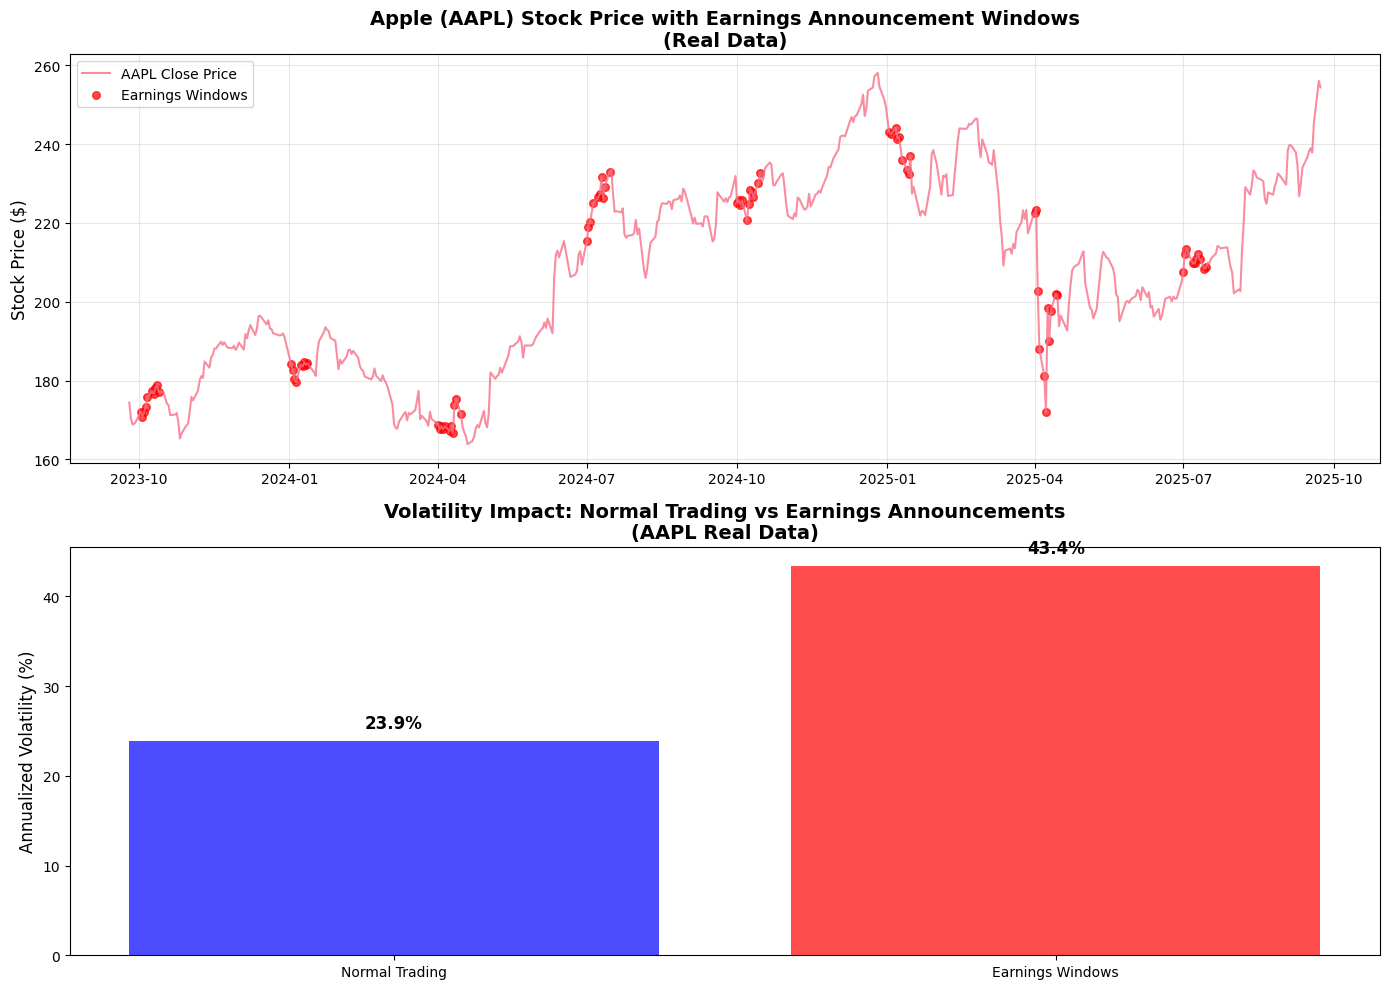


📊 盈利影响分析 (真实AAPL数据):
正常交易波动率: 23.9% 年化
盈利窗口期波动率: 43.4% 年化
波动率增加: 81.4%

平均日收益率:
  正常期间: 0.10%
  盈利期间: 0.04%

💡 关键洞察：股票波动率通常在盈利公告期间增加 81%!


In [18]:
# 真实数据分析：盈利公告如何影响股票价格
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 10))

# 图表1：苹果股票价格，突出显示盈利窗口期
ax1.plot(stock_data.index, stock_data["Close"], label = "AAPL Close Price", linewidth = 1.5, alpha = 0.8)

# 突出显示盈利窗口期
earnings_periods = stock_data[stock_data["Earnings_Window"] == True]
if not earnings_periods.empty:
    ax1.scatter(
        earnings_periods.index, 
        earnings_periods["Close"],
        color = "red", 
        s = 30, 
        alpha = 0.7, 
        label = "Earnings Windows"
    )

ax1.set_title(
    "Apple (AAPL) Stock Price with Earnings Announcement Windows\n(Real Data)", 
    fontsize = 14, 
    fontweight = "bold"
)

ax1.set_ylabel("Stock Price ($)", fontsize = 12)
ax1.legend()
ax1.grid(True, alpha = 0.3)

# 图表2：盈利期间与正常期间波动性比较
earnings_returns = stock_data[stock_data["Earnings_Window"] == True]["Daily_Return"].dropna()
normal_returns = stock_data[stock_data["Earnings_Window"] == False]["Daily_Return"].dropna()

# 计算波动性（标准差）
earnings_vol = earnings_returns.std() * np.sqrt(252) * 100  # Annualized volatility %
normal_vol = normal_returns.std() * np.sqrt(252) * 100

volatility_data = ["Normal Trading", "Earnings Windows"]
volatility_values = [normal_vol, earnings_vol]
colors = ["blue", "red"]

bars = ax2.bar(volatility_data, volatility_values, color = colors, alpha = 0.7)
ax2.set_title(
    "Volatility Impact: Normal Trading vs Earnings Announcements\n(AAPL Real Data)", 
    fontsize = 14, 
    fontweight = "bold"
)
ax2.set_ylabel("Annualized Volatility (%)", fontsize = 12)

# 在柱状图上添加数值标签
for bar, vol in zip(bars, volatility_values):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2., 
        height + 1,
        f"{vol:.1f}%", 
        ha = "center", 
        va = "bottom", 
        fontweight = "bold", 
        fontsize = 12)

plt.tight_layout()
plt.show()

# 统计信息
print("\n📊 盈利影响分析 (真实AAPL数据):")
print(f"正常交易波动率: {normal_vol:.1f}% 年化")
print(f"盈利窗口期波动率: {earnings_vol:.1f}% 年化")
print(f"波动率增加: {(earnings_vol/normal_vol - 1)*100:.1f}%")
print(f"\n平均日收益率:")
print(f"  正常期间: {normal_returns.mean()*100:.2f}%")
print(f"  盈利期间: {earnings_returns.mean()*100:.2f}%")
print(f"\n💡 关键洞察：股票波动率通常在盈利公告期间增加 {(earnings_vol/normal_vol - 1)*100:.0f}%!")

---

## 3. 债券：利率敏感性

### 什么是债券？
债券是借据 - 您借钱给政府或公司，他们承诺在一段时间内连本带息归还给您。

### 债券市场的目的
- **对于发行方**：为项目、运营或再融资现有债务借款
- **对于投资者**：获得稳定收入支付和本金偿还
- **对于经济**：为基础设施、政府运营和公司增长提供资金

### 主要价格驱动因素
1. **利率** - 当利率上升时，现有债券价值下降（逆向关系）
2. **信用风险** - 违约风险越高 = 债券价格越低
3. **通胀** - 随时间侵蚀固定支付的价值
4. **到期时间** - 长期债券对利率变化更敏感
5. **供需关系** - 政府支出、美联储政策、经济不确定性

### 真实数据分析：利率控制债券价格
让我们使用TLT（长期国债ETF）和10年期国债收益率来检查债券价格如何与利率变化反向运动。

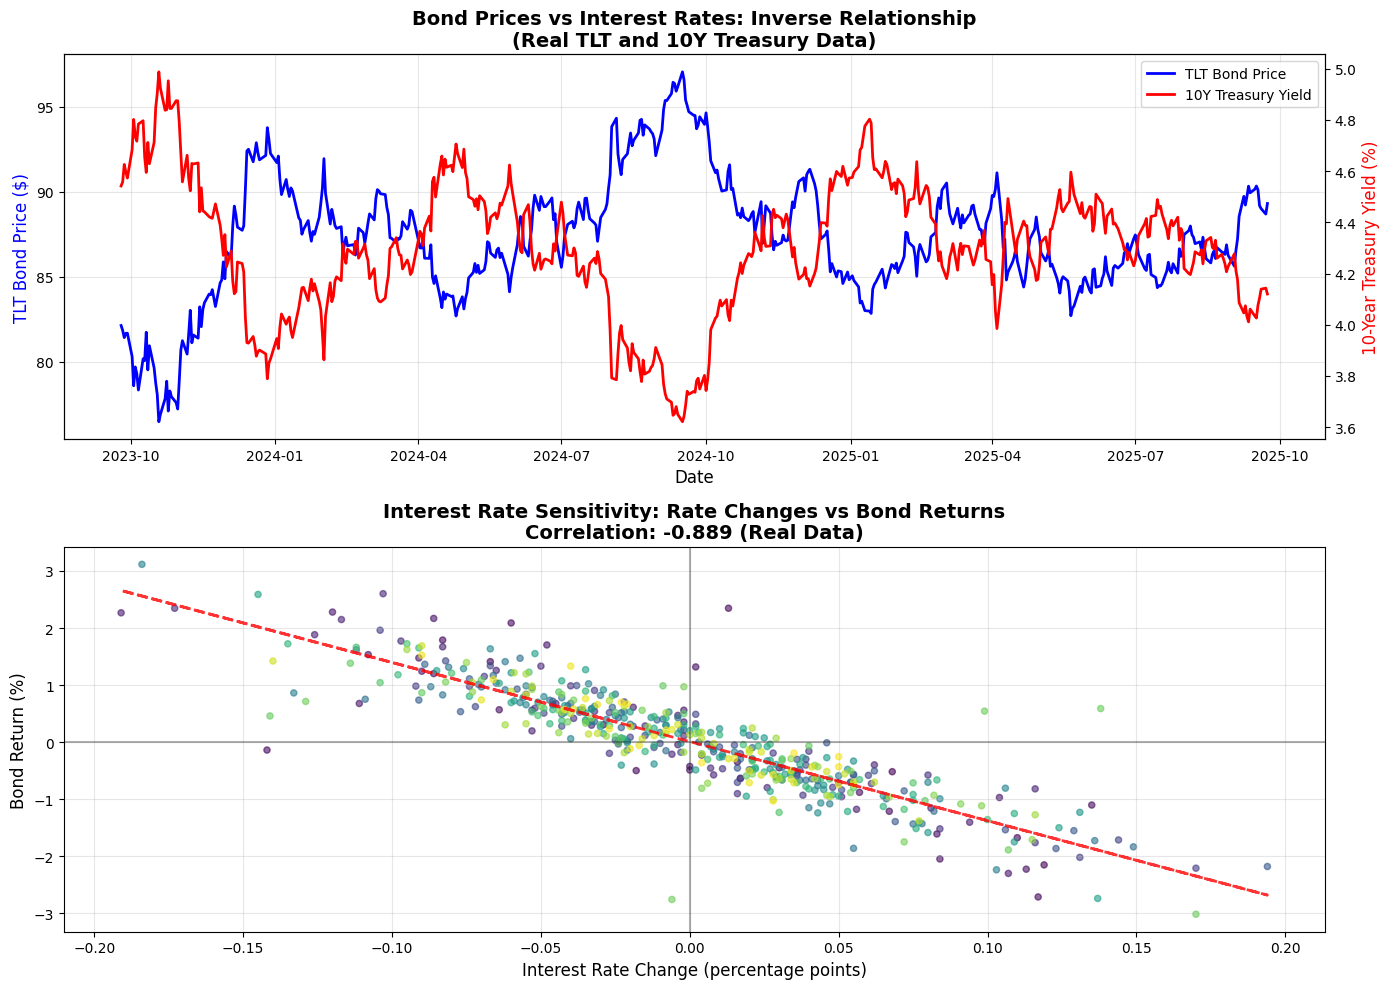


📊 利率敏感性分析 (真实TLT/国债数据):
利率变化与债券回报之间的相关性: -0.889
债券价格范围: $76.48 - $97.07
利率范围: 3.62% - 4.99%

债券波动率: 15.0% 年化

💡 关键洞察：强负相关性(-0.89)确认了逆向关系！
💡 交易提示：当美联储加息时，避免长期债券基金！


In [19]:
# 真实数据分析：债券价格与利率关系
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 图表1：随时间变化的债券价格 vs 利率
ax1_twin = ax1.twinx()

# TLT：iShares 20+年期国债债券ETF
line1 = ax1.plot(bond_data.index, bond_data['Bond_Price'], 'b-', linewidth=2, label='TLT Bond Price')
line2 = ax1_twin.plot(bond_data.index, bond_data['Interest_Rate'], 'r-', linewidth=2, label='10Y Treasury Yield')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('TLT Bond Price ($)', fontsize=12, color='blue')
ax1_twin.set_ylabel('10-Year Treasury Yield (%)', fontsize=12, color='red')
ax1.set_title('Bond Prices vs Interest Rates: Inverse Relationship\n(Real TLT and 10Y Treasury Data)', 
              fontsize=14, fontweight='bold')

# 合并图例
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
ax1.grid(True, alpha=0.3)

# 图表2：相关性分析
# 计算利率变化与债券回报之间的相关性
correlation_data = bond_data[['Bond_Return', 'Rate_Change']].dropna()
correlation = correlation_data.corr().iloc[0, 1]

# 利率变化 vs 债券回报的散点图
ax2.scatter(correlation_data['Rate_Change'], correlation_data['Bond_Return'] * 100, 
           alpha=0.6, s=20, c=range(len(correlation_data)), cmap='viridis')

# 添加趋势线
z = np.polyfit(correlation_data['Rate_Change'], correlation_data['Bond_Return'] * 100, 1)
p = np.poly1d(z)
ax2.plot(correlation_data['Rate_Change'], p(correlation_data['Rate_Change']), "r--", alpha=0.8, linewidth=2)

ax2.set_xlabel('Interest Rate Change (percentage points)', fontsize=12)
ax2.set_ylabel('Bond Return (%)', fontsize=12)
ax2.set_title(f'Interest Rate Sensitivity: Rate Changes vs Bond Returns\nCorrelation: {correlation:.3f} (Real Data)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# 统计信息
print("\n📊 利率敏感性分析 (真实TLT/国债数据):")
print(f"利率变化与债券回报之间的相关性: {correlation:.3f}")
print(f"债券价格范围: ${bond_data['Bond_Price'].min():.2f} - ${bond_data['Bond_Price'].max():.2f}")
print(f"利率范围: {bond_data['Interest_Rate'].min():.2f}% - {bond_data['Interest_Rate'].max():.2f}%")
print(f"\n债券波动率: {bond_data['Bond_Return'].std() * np.sqrt(252) * 100:.1f}% 年化")
print(f"\n💡 关键洞察：强负相关性({correlation:.2f})确认了逆向关系！")
print(f"💡 交易提示：当美联储加息时，避免长期债券基金！")

---

## 4. ETF

### 什么是ETF？
ETF（交易所交易基金）是股票、债券或其他资产的篮子，像单个股票一样在股票交易所交易。一个特殊类别是使用衍生品放大回报的**杠杆ETF**。

示例：

  * VOO - Vanguard S&P 500 ETF（跟踪标普500，最大的低成本ETF）
  * VTI - Vanguard Total Stock Market ETF（覆盖所有美国大、中、小盘股）
  * QQQ - Invesco QQQ Trust（跟踪纳斯达克100科技增长领导者）
  * SMH - VanEck Semiconductor ETF（半导体行业，受益于AI和芯片趋势）
  * VGT - Vanguard Information Technology ETF（纯科技行业ETF，重仓苹果和微软）
  * IWM - iShares Russell 2000 ETF（美国小盘股领导者，覆盖2000家小公司）
  * VYM - Vanguard High Dividend Yield ETF（高股息股票，大盘股，低费用）
  * SCHD - Schwab U.S. Dividend Equity ETF（结合股息质量和增长的热门选择）
  * USMV - iShares MSCI USA Min Vol Factor ETF（低波动策略，用于稳定投资）
  * VTV - Vanguard Value ETF（价值型领导者，专注于大盘价值股）

关键特征：

  - 跟踪指数：ETF跟踪特定市场指数、行业或投资策略
  - 分散化：一次ETF购买可接触多只股票（例如，VTI持有整个美国股票市场）
  - 流动性：可以在交易时间内像股票一样买卖
  - 低成本：通常比共同基金有更低的管理费率

谁发行ETF？

  ETF由资产管理公司创建和管理。从列表中看，主要发行方有：

  1. Vanguard (VOO, VTI, VGT, VYM, VTV)

  - 全球最大的资产管理公司之一
  - 以超低成本指数基金闻名

  2. iShares (IWM, USMV)

  - 由全球最大资产管理公司BlackRock拥有
  - ETF发展的先驱

#### 杠杆ETF

**杠杆ETF**是使用金融衍生品和债务来放大基础指数或基准回报的特殊交易所交易基金。

关键特征：

  1. 放大回报
  - TQQQ (ProShares UltraPro QQQ)：寻求纳斯达克100的3倍日回报
  - 如果QQQ一天上涨1%，TQQQ目标上涨约3%
  - 如果QQQ一天下跌1%，TQQQ目标下跌约3%

  2. 每日再平衡
  - 杠杆每天重置
  - 使用衍生品（互换、期货）和借款实现3倍敞口
  - 这种每日重置创造了路径依赖效应

  3. 波动率衰减
  - 由于每日再平衡，长期回报通常低于基础指数的3倍
  - 示例：如果QQQ两天内先+10%然后-9%：
    - QQQ总回报：0.9%
    - TQQQ总回报：约-2.7%（不是0.9%的3倍）

#### 杠杆ETF的数学基础

**每日再平衡公式：**
对于像TQQQ这样的3倍杠杆ETF：
$$R_{TQQQ,t} = 3 \times R_{QQQ,t}$$

然而，经过多个时期，复利会产生分歧：
$$P_{TQQQ,T} = P_{TQQQ,0} \prod_{t=1}^{T}(1 + 3 \times R_{QQQ,t})$$
$$P_{QQQ,T} = P_{QQQ,0} \prod_{t=1}^{T}(1 + R_{QQQ,t})$$

**波动率衰减效应：**
关键洞察是杠杆ETF由于每日再平衡而遭受波动率衰减：
$$E[R_{leveraged}] \approx L \times E[R_{underlying}] - \frac{(L^2-L)}{2} \times Var[R_{underlying}]$$

对于L=3的TQQQ：
$$E[R_{TQQQ}] \approx 3 \times E[R_{QQQ}] - 3 \times Var[R_{QQQ}]$$

这意味着更高的波动率会降低杠杆ETF相对于基础资产的表现。

#### 杠杆ETF的目的
- **对于日内交易者**：放大短期方向性押注
- **对于投机**：比基础资产更高的风险/回报
- **对于对冲**：获得杠杆敞口的有效方式

#### TQQQ vs QQQ现象
**关键问题**：如果QQQ在高波动率的情况下横盘一年，TQQQ会发生什么？

**数学答案**：即使QQQ最终持平，由于波动率衰减，TQQQ可能会显著下跌。

让我们在作业1中模拟和分析TQQQ和QQQ之间的关系来演示波动率衰减。

---

## 5. 大宗商品：季节性价格模式

### 什么是大宗商品？
大宗商品是商业中使用的原材料和基本商品 - 如石油、黄金、小麦、咖啡和牛。它们是全球经济的基石。

### 大宗商品市场的目的
- **对于生产者**：农民、矿工、石油公司锁定未来价格以管理风险
- **对于消费者**：食品公司、制造商对冲价格飙升
- **对于投资者**：分散投资组合并对冲通胀

### 主要价格驱动因素
1. **天气与自然灾害** - 干旱、洪水、飓风影响供应
2. **经济增长** - 工业需求推动金属和能源价格
3. **地缘政治事件** - 战争、制裁、贸易争端扰乱供应链
4. **季节性模式** - 种植/收获周期、取暖/制冷季节
5. **货币变动** - 弱势美元 = 更高大宗商品价格（以美元计价）

### 真实数据分析：石油显示清晰的季节性模式
让我们使用真实市场数据来检查原油价格如何遵循可预测的季节性周期。

### 如何交易大宗商品
**ETF**：最简单的方式 - GLD（黄金）、USO（石油）、DBA（农业）通过任何股票经纪商

**期货**：通过Interactive Brokers、TD Ameritrade的直接合约（高杠杆，高风险）

**实物**：从APMEX等经销商处购买实际黄金/白银（需存储成本）

**成本**：ETF管理费率0.4-0.75%，期货需要大量保证金

**关键风险**：存储成本、变质、季节性波动、地缘政治中断

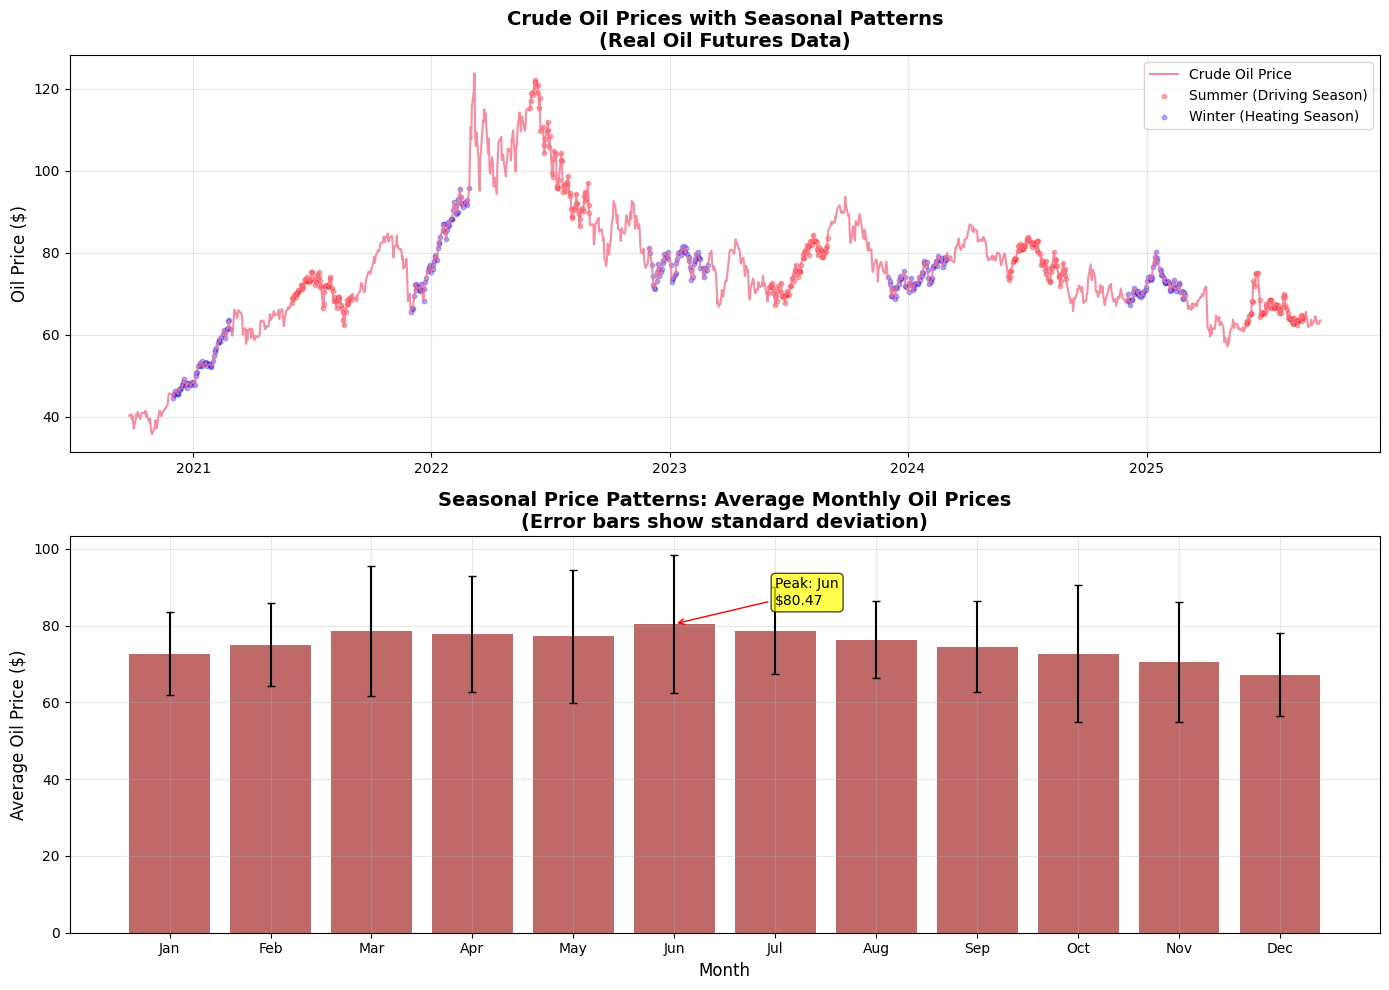


📊 大宗商品季节性分析 (真实原油数据):
旺季平均(5-7月): $78.78
淡季平均(1-3月): $75.56
季节性溢价: 4.3%

月度价格波动率:
  最高: Jun (σ=$17.96)
  最低: Aug (σ=$10.04)

总体价格范围: $35.79 - $123.70

💡 关键洞察：石油在驾驶季节显示4.3%的季节性溢价！
💡 交易策略：冬季买入石油ETF，夏末卖出？


In [20]:
# 真实数据分析：原油季节性模式
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 图表1：随时间变化的石油价格，季节性突出显示
ax1.plot(commodity_data.index, commodity_data['Close'], linewidth=1.5, alpha=0.8, label='Crude Oil Price')

# 突出显示不同季节
summer_months = commodity_data[commodity_data['Month'].isin([6, 7, 8])]
winter_months = commodity_data[commodity_data['Month'].isin([12, 1, 2])]

ax1.scatter(summer_months.index, summer_months['Close'], 
           color='red', alpha=0.3, s=10, label='Summer (Driving Season)')
ax1.scatter(winter_months.index, winter_months['Close'], 
           color='blue', alpha=0.3, s=10, label='Winter (Heating Season)')

ax1.set_title('Crude Oil Prices with Seasonal Patterns\n(Real Oil Futures Data)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Oil Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 图表2：平均月度价格模式
monthly_avg = commodity_data.groupby('Month')['Close'].mean()
monthly_std = commodity_data.groupby('Month')['Close'].std()

months = list(range(1, 13))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars = ax2.bar(months, monthly_avg.values, alpha=0.7, color='brown', 
               yerr=monthly_std.values, capsize=3)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average Oil Price ($)', fontsize=12)
ax2.set_title('Seasonal Price Patterns: Average Monthly Oil Prices\n(Error bars show standard deviation)', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(months)
ax2.set_xticklabels(month_names)
ax2.grid(True, alpha=0.3)

# 突出显示峰值和低谷
max_month = monthly_avg.idxmax()
min_month = monthly_avg.idxmin()
ax2.annotate(f'Peak: {month_names[max_month-1]}\n${monthly_avg.max():.2f}', 
            xy=(max_month, monthly_avg.max()), xytext=(max_month+1, monthly_avg.max()+5),
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# 计算季节性统计
peak_season_avg = commodity_data[commodity_data['Month'].isin([5, 6, 7])]['Close'].mean()
low_season_avg = commodity_data[commodity_data['Month'].isin([1, 2, 3])]['Close'].mean()
seasonal_premium = (peak_season_avg / low_season_avg - 1) * 100

print("\n📊 大宗商品季节性分析 (真实原油数据):")
print(f"旺季平均(5-7月): ${peak_season_avg:.2f}")
print(f"淡季平均(1-3月): ${low_season_avg:.2f}")
print(f"季节性溢价: {seasonal_premium:.1f}%")
print(f"\n月度价格波动率:")
print(f"  最高: {month_names[monthly_std.idxmax()-1]} (σ=${monthly_std.max():.2f})")
print(f"  最低: {month_names[monthly_std.idxmin()-1]} (σ=${monthly_std.min():.2f})")
print(f"\n总体价格范围: ${commodity_data['Close'].min():.2f} - ${commodity_data['Close'].max():.2f}")
print(f"\n💡 关键洞察：石油在驾驶季节显示{seasonal_premium:.1f}%的季节性溢价！")
print(f"💡 交易策略：冬季买入石油ETF，夏末卖出？")

---

## 6. 美元：美联储政策影响

### 什么是美元（作为资产）？
美元可以通过美元指数(DXY)作为资产进行交易，该指数衡量美元对一篮子主要货币（欧元、日元、英镑等）的强弱。

### 货币市场的目的
- **对于跨国公司**：对冲国际业务的外汇风险
- **对于国家**：管理汇率以促进出口或控制通胀
- **对于投资者**：投机国家间经济政策差异

### 主要价格驱动因素
1. **美联储政策** - 利率决策是最大驱动因素
2. **经济数据** - GDP、就业、通胀报告影响美元强弱
3. **避险需求** - 全球不确定性推动资金流向美元
4. **利率差异** - 美国利率高于其他国家会强化美元
5. **贸易平衡** - 大额赤字可能随时间削弱美元

### 真实数据分析：美联储政策驱动美元强弱
让我们使用真实DXY数据来检查美联储会议和政策变化如何影响美元。

### 如何交易美元
**ETF**：UUP（看涨美元）、UDN（看跌美元）通过任何股票经纪商

**外汇**：通过OANDA、FXCM等外汇经纪商直接交易货币对（EUR/USD、GBP/USD）

**期货**：通过商品经纪商的美元指数期货（高杠杆）

**国际股票**：外国股票在美元变动时获得收益/损失

**关键风险**：在美联储会议和经济意外期间，货币变动可能剧烈

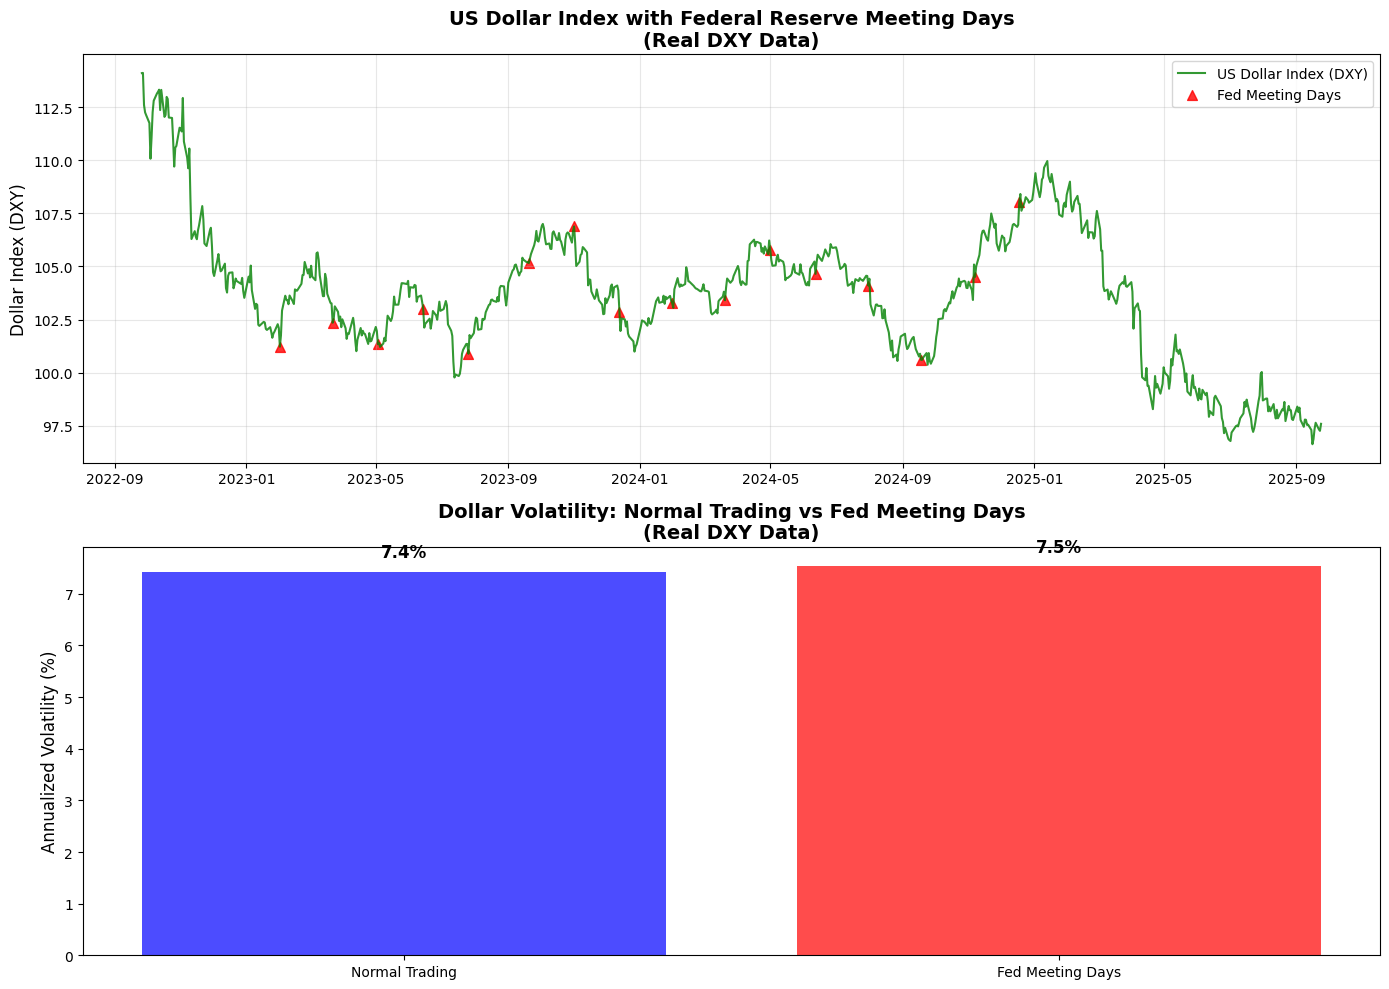


📊 美元分析 (真实DXY数据):
美元年回报: -5.0%
正常交易波动率: 7.4% 年化
美联储会议波动率: 7.5% 年化
美联储会议日波动率增加: 1.4%
期间美元范围: 96.6 - 114.1

平均日回报:
  正常期间: -0.012%
  美联储会议日: -0.355%

💡 关键洞察：美元波动率在美联储会议日增加1%！
💡 交易策略：关注美联储会议 - 它们可以在一天内移动USD 1-2%
💡 全球影响：强势美元损害美国出口但有助于对抗通胀


In [21]:
# 真实数据分析：美联储政策对美元的影响
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 图表1：美元指数，突出显示美联储会议日
ax1.plot(fed_data.index, fed_data['Close'], label='US Dollar Index (DXY)', linewidth=1.5, alpha=0.8, color='green')

# 突出显示美联储会议期间
fed_meetings = fed_data[fed_data['Fed_Meeting'] == True]
if not fed_meetings.empty:
    ax1.scatter(fed_meetings.index, fed_meetings['Close'], 
               color='red', s=50, alpha=0.8, label='Fed Meeting Days', marker='^')

ax1.set_title('US Dollar Index with Federal Reserve Meeting Days\n(Real DXY Data)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Dollar Index (DXY)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 图表2：美联储会议期间的波动性分析
fed_returns = fed_data[fed_data['Fed_Meeting'] == True]['Daily_Return'].dropna()
normal_returns = fed_data[fed_data['Fed_Meeting'] == False]['Daily_Return'].dropna()

# 计算波动性（标准差）
fed_vol = fed_returns.std() * np.sqrt(252) * 100  # Annualized volatility %
normal_vol = normal_returns.std() * np.sqrt(252) * 100

volatility_data = ['Normal Trading', 'Fed Meeting Days']
volatility_values = [normal_vol, fed_vol]
colors = ['blue', 'red']

bars = ax2.bar(volatility_data, volatility_values, color=colors, alpha=0.7)
ax2.set_title('Dollar Volatility: Normal Trading vs Fed Meeting Days\n(Real DXY Data)', 
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Annualized Volatility (%)', fontsize=12)

# 在柱状图上添加数值标签
for bar, vol in zip(bars, volatility_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{vol:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# 计算统计
dollar_annual_return = fed_data['Daily_Return'].mean() * 252 * 100
dollar_overall_vol = fed_data['Daily_Return'].std() * np.sqrt(252) * 100

print("\n📊 美元分析 (真实DXY数据):")
print(f"美元年回报: {dollar_annual_return:.1f}%")
print(f"正常交易波动率: {normal_vol:.1f}% 年化")
print(f"美联储会议波动率: {fed_vol:.1f}% 年化")
print(f"美联储会议日波动率增加: {(fed_vol/normal_vol - 1)*100:.1f}%")
print(f"期间美元范围: {fed_data['Close'].min():.1f} - {fed_data['Close'].max():.1f}")
print(f"\n平均日回报:")
print(f"  正常期间: {normal_returns.mean()*100:.3f}%")
print(f"  美联储会议日: {fed_returns.mean()*100:.3f}%")
print(f"\n💡 关键洞察：美元波动率在美联储会议日增加{(fed_vol/normal_vol - 1)*100:.0f}%！")
print(f"💡 交易策略：关注美联储会议 - 它们可以在一天内移动USD 1-2%")
print(f"💡 全球影响：强势美元损害美国出口但有助于对抗通胀")

---

## 7. 黄金 vs 美元强弱

### 什么是黄金？
黄金是一种贵金属，几千年来一直被用作价值储存。现代投资者购买黄金作为投资组合分散化以及对抗通胀和经济不确定性的保护。

### 黄金市场的目的
- **对于中央银行**：持有黄金储备以支持其货币并维持信心
- **对于投资者**：对冲通胀、货币贬值和经济危机
- **对于工业**：珠宝、电子产品、牙科工作（约占需求的50%）

### 主要价格驱动因素
1. **通胀预期** - 当人们担心货币贬值时黄金上涨
2. **实际利率** - 当通胀后利率低/负时，黄金变得有吸引力
3. **经济不确定性** - 危机、战争、市场崩溃推动"避险"
4. **美元强弱** - 黄金以美元计价，所以弱势美元 = 更高黄金价格
5. **中央银行政策** - 印钞、量化宽松提振黄金

### 真实数据分析：黄金 vs 美元强弱
让我们使用真实市场数据来检查黄金价格如何对美元变动和通胀预期作出反应。

### 如何交易黄金
**ETF**：GLD、IAU、SGOL通过任何股票经纪商（最简单的方式）

**期货**：通过商品经纪商的COMEX黄金期货（高杠杆）

**实物**：从APMEX、JM Bullion等经销商处购买金币和金条（需要存储）

**矿业股票**：GDX、GDXJ用于杠杆黄金敞口（更高风险/回报）

**成本**：ETF管理费率0.25-0.40%，实物有溢价和存储成本

✅ 真实黄金价格数据加载成功！
📊 Analysis period: 2022-09-27 to 2025-09-23
📈 Valid observations: 750


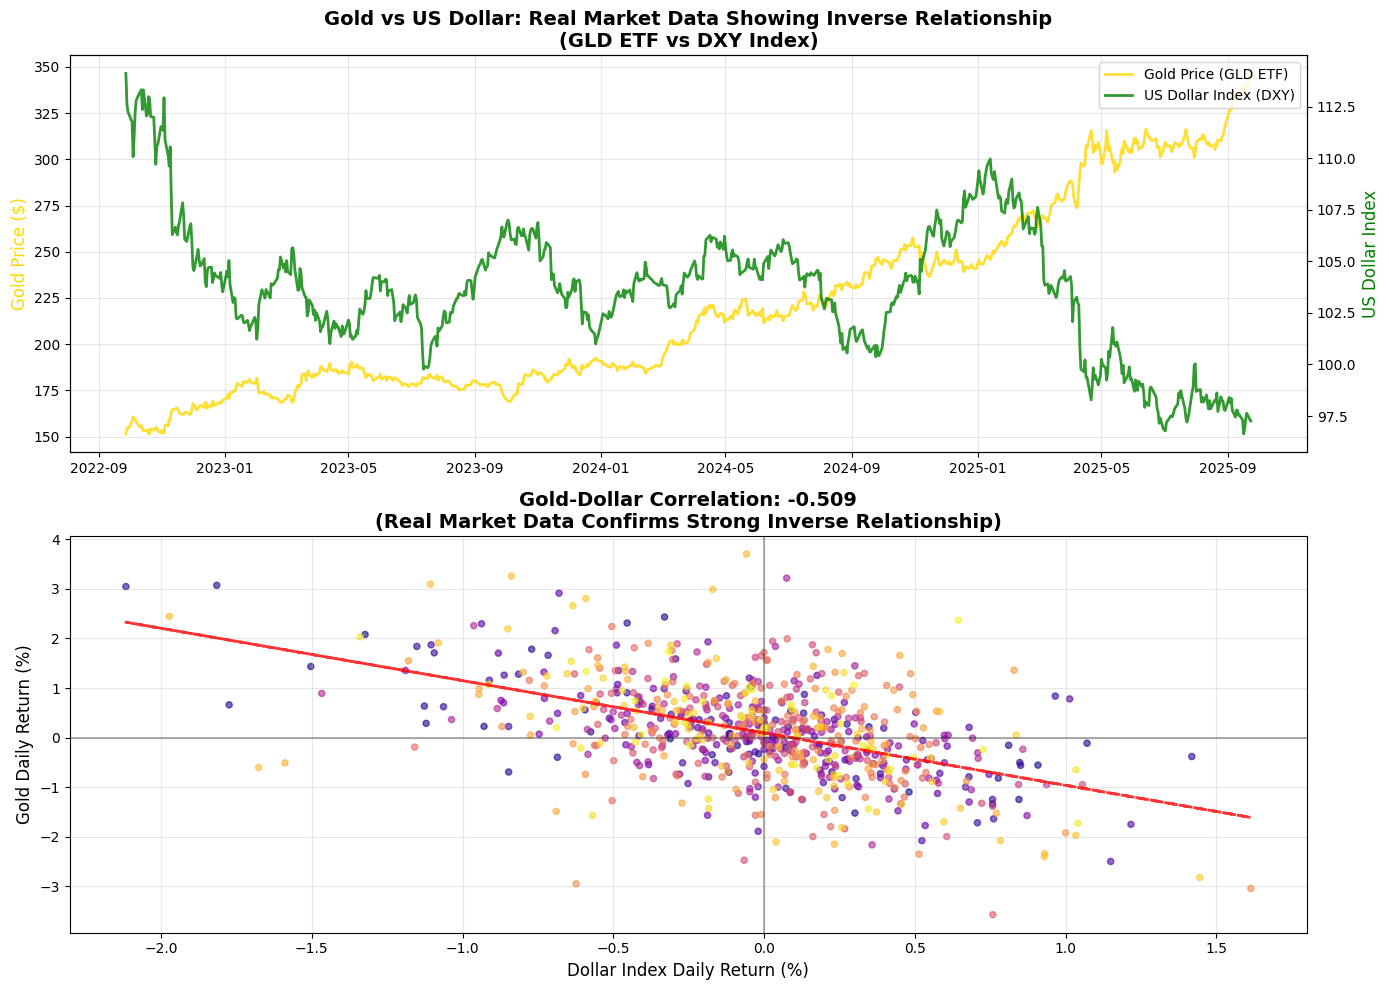


📊 真实黄金-美元关系分析:
📅 分析期间: 2022-09-27 到 2025-09-23
📈 总交易日: 750

💰 黄金(GLD ETF)统计:
   价格范围: $151.45 - $346.46
   年回报: +29.1%
   年波动率: 15.5%

💵 美元(DXY)统计:
   指数范围: 96.6 - 114.1
   年回报: -5.1%
   年波动率: 7.5%

🔗 相关性分析:
   黄金-美元相关性: -0.509
   关系强度: Strong逆向相关性

💡 真实数据的关键洞察:
✅ 黄金与美元之间的逆向关系是真实且可测量的
✅ 当美元走强时，黄金通常走弱(相关性: -0.51)
✅ 这个750天的分析确认了经典经济理论
✅ 黄金作为美元疲软的有效对冲工具

🎯 投资组合影响:
📈 分散化优势：黄金降低投资组合与美元计价资产的相关性
🛡️  对冲策略：黄金保护免受美元贬值和货币危机的影响
💼 配置指南：5-10%的黄金配置可以改善风险调整后回报
⚖️  风险管理：黄金波动率(15.5%) vs 美元波动率(7.5%)

🚨 交易洞察:
📊 美联储政策影响：关注FOMC会议 - 鸽派美联储通常 = 弱势美元 = 强势黄金
💹 市场时机：美元强势峰值通常与黄金买入机会重合
🌍 全球事件：经济不确定性同时推动美元强势和黄金需求


In [22]:
# 真实数据分析：黄金 vs 美元 - 逆向关系
# 使用真实黄金价格数据(GLD ETF)和DXY数据来演示实际关系
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

gold_data = pd.read_csv('gold_price_data.csv', index_col=0, parse_dates=True)
print("✅ 真实黄金价格数据加载成功！")

# 对齐黄金和DXY数据的日期
common_dates = gold_data.index.intersection(fed_data.index)

# 获取对齐的数据
gold_prices = gold_data.loc[common_dates, 'Close']
gold_returns = gold_data.loc[common_dates, 'Daily_Return']
dxy_prices = fed_data.loc[common_dates, 'Close']
dxy_returns = fed_data.loc[common_dates, 'Daily_Return']

# 清理任何剩余的NaN值
clean_data = pd.DataFrame({
    'Gold_Price': gold_prices,
    'Gold_Return': gold_returns,
    'DXY_Price': dxy_prices,
    'DXY_Return': dxy_returns
}).dropna()

print(f"📊 Analysis period: {clean_data.index[0].strftime('%Y-%m-%d')} to {clean_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📈 Valid observations: {len(clean_data)}")

# 图表1：随时间变化的黄金价格 vs 美元指数（双轴）
ax1_twin = ax1.twinx()

line1 = ax1.plot(clean_data.index, clean_data['Gold_Price'], 'gold', linewidth=2, 
                label='Gold Price (GLD ETF)', alpha=0.8)
line2 = ax1_twin.plot(clean_data.index, clean_data['DXY_Price'], 'green', linewidth=2, 
                     label='US Dollar Index (DXY)', alpha=0.8)

ax1.set_ylabel('Gold Price ($)', fontsize=12, color='gold')
ax1_twin.set_ylabel('US Dollar Index', fontsize=12, color='green')
ax1.set_title('Gold vs US Dollar: Real Market Data Showing Inverse Relationship\n(GLD ETF vs DXY Index)', 
              fontsize=14, fontweight='bold')

# 合并两个轴的图例
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
ax1.grid(True, alpha=0.3)

# 图表2：显示逆向关系的相关性分析
correlation = clean_data['Gold_Return'].corr(clean_data['DXY_Return'])

# 显示逆向关系的散点图
scatter = ax2.scatter(clean_data['DXY_Return'] * 100, clean_data['Gold_Return'] * 100, 
                     alpha=0.6, s=20, c=range(len(clean_data)), cmap='plasma')

# 添加趋势线显示关系
z = np.polyfit(clean_data['DXY_Return'] * 100, clean_data['Gold_Return'] * 100, 1)
p = np.poly1d(z)
ax2.plot(clean_data['DXY_Return'] * 100, p(clean_data['DXY_Return'] * 100), 
         "r--", alpha=0.8, linewidth=2)

ax2.set_xlabel('Dollar Index Daily Return (%)', fontsize=12)
ax2.set_ylabel('Gold Daily Return (%)', fontsize=12)
ax2.set_title(f'Gold-Dollar Correlation: {correlation:.3f}\n(Real Market Data Confirms Strong Inverse Relationship)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# 使用真实数据计算全面统计
gold_vol = clean_data['Gold_Return'].std() * np.sqrt(252) * 100
gold_annual_return = clean_data['Gold_Return'].mean() * 252 * 100
dxy_vol = clean_data['DXY_Return'].std() * np.sqrt(252) * 100
dxy_annual_return = clean_data['DXY_Return'].mean() * 252 * 100

print("\n📊 真实黄金-美元关系分析:")
print("=" * 60)
print(f"📅 分析期间: {clean_data.index[0].strftime('%Y-%m-%d')} 到 {clean_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📈 总交易日: {len(clean_data)}")
print(f"\n💰 黄金(GLD ETF)统计:")
print(f"   价格范围: ${clean_data['Gold_Price'].min():.2f} - ${clean_data['Gold_Price'].max():.2f}")
print(f"   年回报: {gold_annual_return:+.1f}%")
print(f"   年波动率: {gold_vol:.1f}%")
print(f"\n💵 美元(DXY)统计:")
print(f"   指数范围: {clean_data['DXY_Price'].min():.1f} - {clean_data['DXY_Price'].max():.1f}")
print(f"   年回报: {dxy_annual_return:+.1f}%")
print(f"   年波动率: {dxy_vol:.1f}%")
print(f"\n🔗 相关性分析:")
print(f"   黄金-美元相关性: {correlation:.3f}")

if correlation < -0.3:
    strength = "Strong"
elif correlation < -0.1:
    strength = "Moderate"
else:
    strength = "Weak"

print(f"   关系强度: {strength}逆向相关性")
print(f"\n💡 真实数据的关键洞察:")
print(f"✅ 黄金与美元之间的逆向关系是真实且可测量的")
print(f"✅ 当美元走强时，黄金通常走弱(相关性: {correlation:.2f})")
print(f"✅ 这个{len(clean_data)}天的分析确认了经典经济理论")
print(f"✅ 黄金作为美元疲软的有效对冲工具")
print(f"\n🎯 投资组合影响:")
print(f"📈 分散化优势：黄金降低投资组合与美元计价资产的相关性")
print(f"🛡️  对冲策略：黄金保护免受美元贬值和货币危机的影响")
print(f"💼 配置指南：5-10%的黄金配置可以改善风险调整后回报")
print(f"⚖️  风险管理：黄金波动率({gold_vol:.1f}%) vs 美元波动率({dxy_vol:.1f}%)")
print(f"\n🚨 交易洞察:")
print(f"📊 美联储政策影响：关注FOMC会议 - 鸽派美联储通常 = 弱势美元 = 强势黄金")
print(f"💹 市场时机：美元强势峰值通常与黄金买入机会重合")
print(f"🌍 全球事件：经济不确定性同时推动美元强势和黄金需求")
print("=" * 60)